In [1]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pickle as pkl
import pandas as pd
from queue import PriorityQueue

In [2]:
with open("cdiac_priority_list", 'rb') as f:
	cdiac_priority_list = pkl.load(f)

cdiac_baseline_list = cdiac_priority_list.copy()
cdiac_priority_list.sort(key = lambda x: -x[2], reverse=True)

1500438
-10.448103090630696
-10.448103090630696
-10.448103090630696
-10.448103090630696
-10.448103038922861
-10.448103038922861
-10.448103038922861
-10.448103038922861
3.287202836864106
-10.448103090630696
119152


Text(0.5, 0, 'Data')

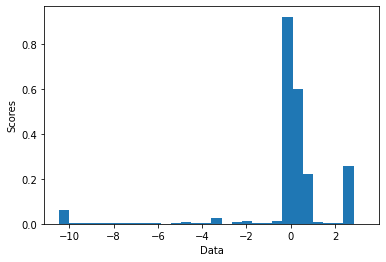

In [3]:
print(len(cdiac_priority_list))
max = 0
min = float("inf")
scheduler_scores = []
sig_count = 0
for i in range(len(cdiac_priority_list)):
	if i < 8:
		print(cdiac_priority_list[i][2])
	if (cdiac_priority_list[i][2] < -0.1):
		sig_count += 1


	scheduler_scores.append(cdiac_priority_list[i][2])
	if cdiac_priority_list[i][2] > max:
		max = cdiac_priority_list[i][2]
	if cdiac_priority_list[i][2] < min:
		min = cdiac_priority_list[i][2]

print(max)
print(min)
print(sig_count)

plt.hist(scheduler_scores, density=True, bins=30)
plt.ylabel('Scores')
plt.xlabel('Data')


In [4]:
numtoname = pd.read_csv("csv-try-2.csv")
numtoname.head()
count = 0
names = numtoname['path']
indices = range(1, len(names) + 1)


nametonum = dict(zip(names, indices))

print(len(nametonum.items()))


for k, v in nametonum.items():
	print(k, v)
	break


214314
/eagle/Xtract/cdiac/interchange.stderr 1


In [5]:
dict_of_dicts = dict()
for subdir, dirs, files in os.walk("cdiac_data"):
	for file_name in files:
		name = file_name.split(".")[0].split("cdiac")[1].split("scores")[0]
		print(name)
		with open(os.path.join(subdir, file_name), "r") as f:
			dict_of_dicts[name] = json.load(f)
			if name == "tabular":
				print(len(dict_of_dicts[name]))


images
python
netcdf
keyword
jsonxml
c-code
tabular
214314


In [6]:
for k in dict_of_dicts:
	print(k)
			

images
python
netcdf
keyword
jsonxml
c-code
tabular


In [7]:
scores = {"readability": [], "completeness": [], "entropy": [], "yield": []}
wrong_indices = []

count = 0
random = 0

for name, extractor, score in cdiac_priority_list:
		try:
			file_index = str(nametonum[name])
			file_score_dict = dict_of_dicts[extractor][file_index] 

			for key, value in file_score_dict.items():
				if key == 'readability' and not isinstance(value, list):
					if value != 0:
						print(value)

				if isinstance(value, list):
					if value[1] != 0:
						count += 1
						scores[key].append(abs(value[0]) + value[1])
					else:
						scores[key].append(value[0])

				else:
					scores[key].append(value)

		except KeyError as e:
			wrong_indices.append((name, e, extractor))
			if extractor == "keyword":	
				count += 1	
			else:
				random += 1

for key, value in scores.items():
	scores[key] = np.asarray(value)
	print(len(value))

print("Count:", count)
print("Random:", random)


1500198
1500198
1500198
1500198
Count: 18499
Random: 192


In [8]:
print(wrong_indices[:10])

[('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/KitackLee_Alk_Climatology/ODV_Collection/SurfaceAlkalinityClimatology/gifs/SurfaceAlkalinityClimatology_3.gif', KeyError('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/KitackLee_Alk_Climatology/ODV_Collection/SurfaceAlkalinityClimatology/gifs/SurfaceAlkalinityClimatology_3.gif'), 'images'), ('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/KitackLee_Alk_Climatology/ODV_Collection/SurfaceAlkalinityClimatology/animation/Animation_Monthly.gif', KeyError('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/KitackLee_Alk_Climatology/ODV_Collection/SurfaceAlkalinityClimatology/animation/Animation_Monthly.gif'), 'images'), ('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Benjamin/For_Stew/CdiacBundles/33WA/WS15195_Readme.pdf', KeyError('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Benjamin/For_Stew/CdiacBundles/33WA/WS15195_Readme.pdf'), 'keyword'), ('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/

In [60]:
file_count = {"readability": [], "completeness": [], "entropy": [], "yield": []}

total = {"readability": [], "completeness": [], "entropy": [], "yield": []}

average = {"readability": [], "completeness": [], "entropy": [], "yield": []}


x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for threshold in x:
	input_threshold = threshold * len(cdiac_priority_list)
	input_threshold = int(input_threshold)
	print("Threshold: ", threshold, "File Pairs Analyzed: ", input_threshold)

	if threshold == 0:
		for k, v in file_count.items():
			v.append(0)
		for k, v in total.items():
			v.append(0)
		for k, v in average.items():
			v.append(0)
	else:
		for metric, v in file_count.items():
			if metric == "readability":
				v.append((scores[metric][:input_threshold] != 0).sum())
			elif metric == "completeness":
				v.append((scores[metric][:input_threshold] > 5.0).sum())
			elif metric == "entropy":
				v.append((scores[metric][:input_threshold] != 0).sum())
			else:
				v.append((scores[metric][:input_threshold] > 500.0).sum()) #most files have a yield between 40 and 50 


		for metric, v in total.items():
			v.append(scores[metric][:input_threshold].sum())
		for metric, v in average.items():
			v.append(np.mean(scores[metric][:input_threshold]))

for k, v in file_count.items():
	v = np.asarray(v)

for k, v in total.items():
	v = np.asarray(v)

for k, v in average.items():
	v = np.asarray(v)

Threshold:  0 File Pairs Analyzed:  0
Threshold:  0.1 File Pairs Analyzed:  150043
Threshold:  0.2 File Pairs Analyzed:  300087
Threshold:  0.3 File Pairs Analyzed:  450131
Threshold:  0.4 File Pairs Analyzed:  600175
Threshold:  0.5 File Pairs Analyzed:  750219
Threshold:  0.6 File Pairs Analyzed:  900262
Threshold:  0.7 File Pairs Analyzed:  1050306
Threshold:  0.8 File Pairs Analyzed:  1200350
Threshold:  0.9 File Pairs Analyzed:  1350394
Threshold:  1 File Pairs Analyzed:  1500438


In [61]:
print(file_count['readability'])

[0, 37451, 37451, 37451, 37451, 37451, 37451, 37452, 37452, 37452, 37452]


# BASELINE CALCULATION

In [62]:
count = 0
scores_baseline = {"readability": [], "completeness": [], "entropy": [], "yield": []}
for name, extractor, score in cdiac_baseline_list:
		try:
			file_index = str(nametonum[name])
			file_score_dict = dict_of_dicts[extractor][file_index] 

			for key, value in file_score_dict.items():
				if key == 'readability' and not isinstance(value, list):
					if value != 0:
						print(value)

				if isinstance(value, list):
					if value[1] != 0:
						count += 1
						scores_baseline[key].append(abs(value[0]) + value[1])
					else:
						scores_baseline[key].append(value[0])

				else:
					scores_baseline[key].append(value)

		except KeyError:
			count += 1	

for key, value in scores_baseline.items():
	scores_baseline[key] = np.asarray(value)
	print(len(value))

print(count)

1500198
1500198
1500198
1500198
18691


In [63]:
file_count_baseline = {"readability": [], "completeness": [], "entropy": [], "yield": []}

total_baseline = {"readability": [], "completeness": [], "entropy": [], "yield": []}

average_baseline = {"readability": [], "completeness": [], "entropy": [], "yield": []}


x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for threshold in x:
	input_threshold = threshold * len(cdiac_baseline_list)
	input_threshold = int(input_threshold)
	print("Threshold: ", threshold, "File Pairs Analyzed: ", input_threshold)

	if threshold == 0:
		for k, v in file_count_baseline.items():
			v.append(0)
		for k, v in total_baseline.items():
			v.append(0)
		for k, v in average_baseline.items():
			v.append(0)
	else:
		for metric, v in file_count_baseline.items():
			if metric == "readability":
				v.append((scores_baseline[metric][:input_threshold] != 0).sum())
			elif metric == "completeness":
				v.append((scores_baseline[metric][:input_threshold] > 5.0).sum())
			elif metric == "entropy":
				v.append((scores_baseline[metric][:input_threshold] != 0).sum())
			else:
				v.append((scores_baseline[metric][:input_threshold] > 500.0).sum())


		for metric, v in total_baseline.items():
			v.append(scores_baseline[metric][:input_threshold].sum())
		for metric, v in average_baseline.items():
			v.append(np.mean(scores_baseline[metric][:input_threshold]))

for k, v in file_count_baseline.items():
	v = np.asarray(v)

for k, v in total_baseline.items():
	v = np.asarray(v)

for k, v in average_baseline.items():
	v = np.asarray(v)

Threshold:  0 File Pairs Analyzed:  0
Threshold:  0.1 File Pairs Analyzed:  150043
Threshold:  0.2 File Pairs Analyzed:  300087
Threshold:  0.3 File Pairs Analyzed:  450131
Threshold:  0.4 File Pairs Analyzed:  600175
Threshold:  0.5 File Pairs Analyzed:  750219
Threshold:  0.6 File Pairs Analyzed:  900262
Threshold:  0.7 File Pairs Analyzed:  1050306
Threshold:  0.8 File Pairs Analyzed:  1200350
Threshold:  0.9 File Pairs Analyzed:  1350394
Threshold:  1 File Pairs Analyzed:  1500438


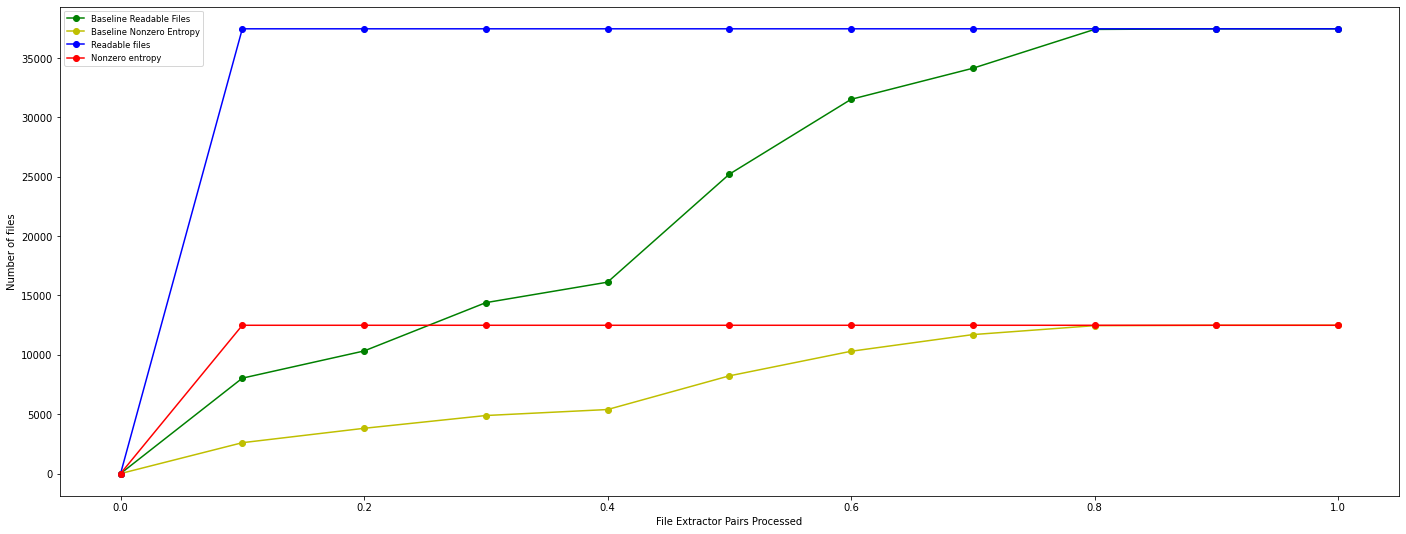

In [67]:
x = np.asarray(x)

plt.figure(figsize=(24, 9))
plt.xlabel("File Extractor Pairs Processed")
plt.ylabel("Number of files")
plt.plot(x, file_count_baseline['readability'], '-o', color='g', label='Baseline Readable Files')
plt.plot(x, file_count_baseline['entropy'], '-o', color='y', label='Baseline Nonzero Entropy')
plt.plot(x, file_count['readability'], '-o', color='b', label='Readable files')
plt.plot(x, file_count['entropy'], '-o', color='r', label='Nonzero entropy')
plt.legend(fontsize='small')

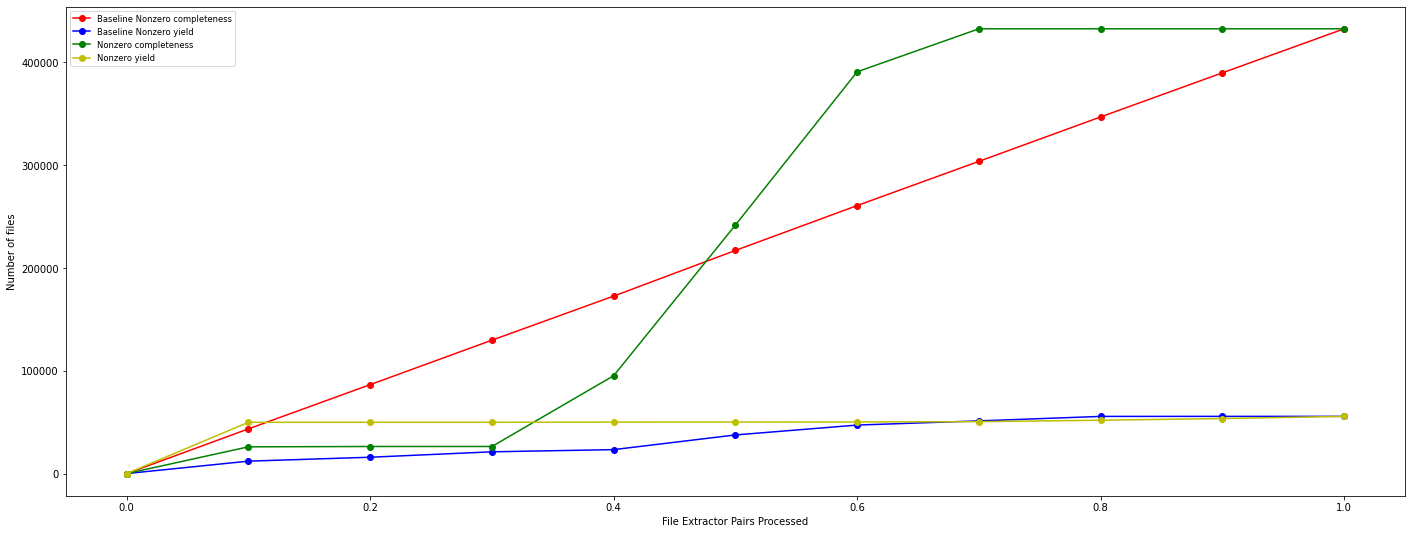

In [68]:
plt.figure(figsize=(24, 9))
plt.xlabel("File Extractor Pairs Processed")
plt.ylabel("Number of files")
plt.plot(x, file_count_baseline['completeness'], '-o', color='r', label='Baseline Nonzero completeness')
plt.plot(x, file_count_baseline['yield'], '-o', color='b', label='Baseline Nonzero yield')
plt.plot(x, file_count['completeness'], '-o', color='g', label='Nonzero completeness')
plt.plot(x, file_count['yield'], '-o', color='y', label='Nonzero yield')
plt.legend(fontsize='small')

In [15]:
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
extractor_count = {"c-code": [], "hdf": [], "images": [], "jsonxml": [], "keyword": [], "netcdf": [], "python": [], 'tabular': []}
extractor_thresh = {"c-code": 0, "hdf": 0, "images": 0, "jsonxml": 0, "keyword": 0, "netcdf": 0, "python": 0, 'tabular': 0}


thresholds = x.copy()
for i in range(len(thresholds)):
	thresholds[i] = int(len(cdiac_priority_list) * thresholds[i])

print(thresholds)
thresholds = set(thresholds) 
print(thresholds)
tabs = 0
i = 0
while i < len(cdiac_priority_list):

	if i == 0:
		for k, v in extractor_count.items():
			v.append(0)
	elif i + 1 in thresholds:
		print(i + 1)
		for k, v in extractor_thresh.items():
			extractor_count[k].append(v)

	extractor_thresh[cdiac_priority_list[i][1]] += 1

	i += 1

print(len(cdiac_priority_list))
print(extractor_thresh)


[0, 150043, 300087, 450131, 600175, 750219, 900262, 1050306, 1200350, 1350394, 1500438]
{0, 1050306, 900262, 750219, 600175, 450131, 1500438, 300087, 1350394, 150043, 1200350}
150043
300087
450131
600175
750219
900262
1050306
1200350
1350394
1500438
1500438
{'c-code': 214362, 'hdf': 0, 'images': 214362, 'jsonxml': 214314, 'keyword': 214362, 'netcdf': 214362, 'python': 214362, 'tabular': 214314}


In [16]:
naive_unique_files = []
scheduler_unique_files = []

scheduler_set = set()
naive_set = set()

i = 0
while i < len(cdiac_priority_list):
	scheduler_set.add(cdiac_priority_list[i][0])
	naive_set.add(cdiac_baseline_list[i][0])

	if i == 0:
		naive_unique_files.append(0)
		scheduler_unique_files.append(0)
	elif i + 1 in thresholds:
		naive_unique_files.append(len(naive_set))
		scheduler_unique_files.append(len(scheduler_set))

	i += 1

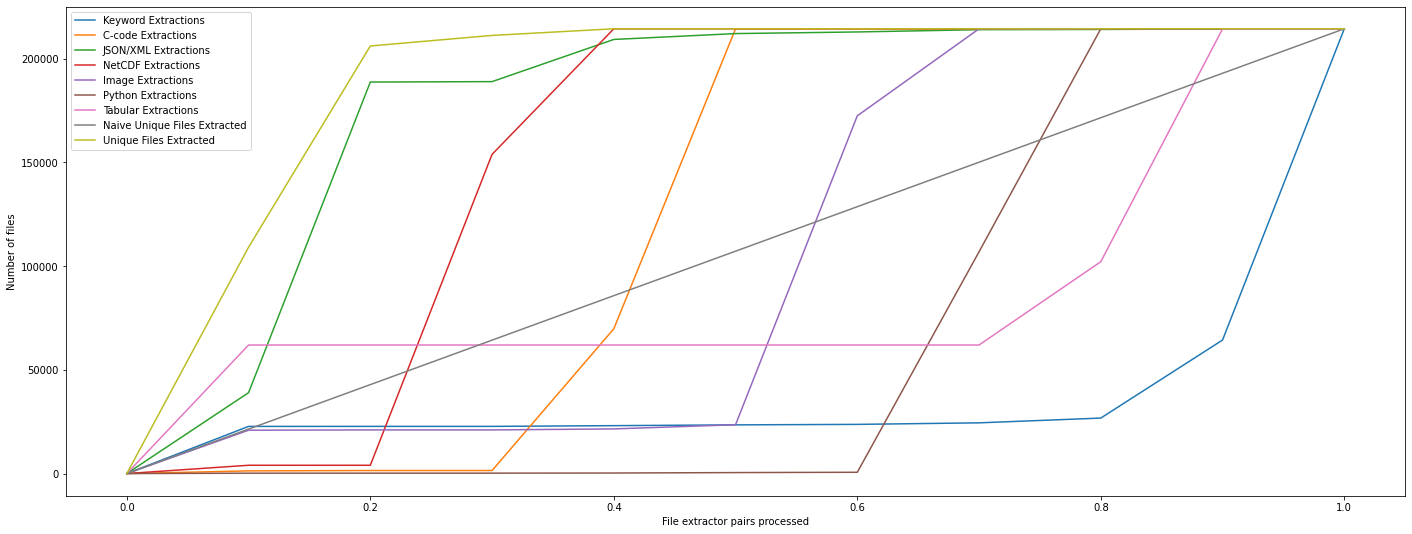

In [17]:
plt.figure(figsize=(24, 9))
plt.plot(x, extractor_count["keyword"], label="Keyword Extractions")
plt.plot(x, extractor_count["c-code"], label="C-code Extractions")
plt.plot(x, extractor_count["jsonxml"], label="JSON/XML Extractions")
plt.plot(x, extractor_count["netcdf"], label="NetCDF Extractions")
plt.plot(x, extractor_count["images"], label="Image Extractions")
plt.plot(x, extractor_count["python"], label="Python Extractions")
plt.plot(x, extractor_count["tabular"], label="Tabular Extractions")
plt.plot(x, naive_unique_files, label="Naive Unique Files Extracted")
plt.plot(x, scheduler_unique_files, label="Unique Files Extracted")


plt.xlabel("File extractor pairs processed")
plt.ylabel("Number of files")
plt.legend()
plt.show()

# Cumulative Metrics

In [18]:
average_readability_norm = average["readability"] / np.max(average["readability"])
average_baseline_readability_norm = average_baseline["readability"] / np.max(average_baseline["readability"])

average_completeness_norm = np.asarray(average["completeness"]) / 100
average_baseline_completeness_norm = np.asarray(average_baseline["completeness"]) / 100

average_yield_norm = np.asarray(average["yield"]) / 100
average_baseline_yield_norm = np.asarray(average_baseline["yield"]) / 100

average_entropy_norm = np.asarray(average["entropy"]) / np.max(average["entropy"])
average_baseline_entropy_norm = np.asarray(average_baseline["entropy"]) / np.max(average_baseline["entropy"])

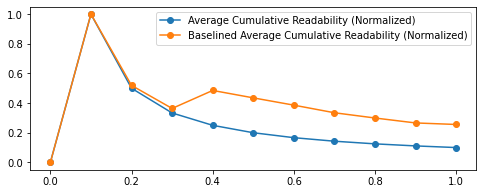

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(x, average_readability_norm, '-o', label="Average Cumulative Readability (Normalized)")
plt.plot(x, average_baseline_readability_norm, '-o', label="Baselined Average Cumulative Readability (Normalized)")
plt.legend()
plt.show()


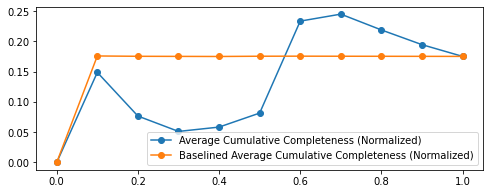

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(x, average_completeness_norm, '-o', label="Average Cumulative Completeness (Normalized)")
plt.plot(x, average_baseline_completeness_norm, '-o', label="Baselined Average Cumulative Completeness (Normalized)")
plt.legend()
plt.show()

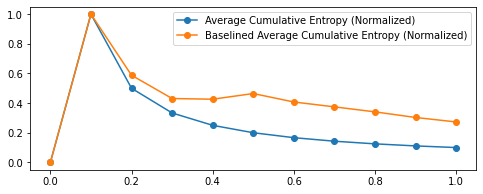

In [21]:
plt.figure(figsize=(8, 3))
plt.plot(x, average_entropy_norm, '-o', label="Average Cumulative Entropy (Normalized)")
plt.plot(x, average_baseline_entropy_norm, '-o', label="Baselined Average Cumulative Entropy (Normalized)")
plt.legend()
plt.show()

In [22]:
print(average_baseline_completeness_norm)

[0.         0.17580847 0.17526627 0.17510771 0.17495569 0.17538416
 0.17546949 0.1753549  0.17527706 0.17517604 0.17509479]


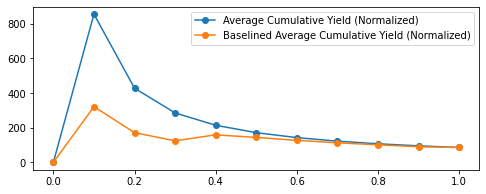

In [23]:
plt.figure(figsize=(8, 3))
plt.plot(x, average_yield_norm, '-o', label="Average Cumulative Yield (Normalized)")
plt.plot(x, average_baseline_yield_norm, '-o', label="Baselined Average Cumulative Yield (Normalized)")
plt.legend()
plt.show()

In [24]:
cum_readability_norm = total["readability"] / np.max(total["readability"])
cum_baseline_readability_norm = total_baseline["readability"] / np.max(total_baseline["readability"])

cum_completeness_norm = np.asarray(total["completeness"]) / 100
cum_baseline_completeness_norm = np.asarray(total_baseline["completeness"]) / 100

cum_yield_norm = np.asarray(total["yield"]) / 100
cum_baseline_yield_norm = np.asarray(total_baseline["yield"]) / 100

cum_entropy_norm = np.asarray(total["entropy"]) / np.max(total["entropy"])
cum_baseline_entropy_norm = np.asarray(total_baseline["entropy"]) / np.max(total_baseline["entropy"])

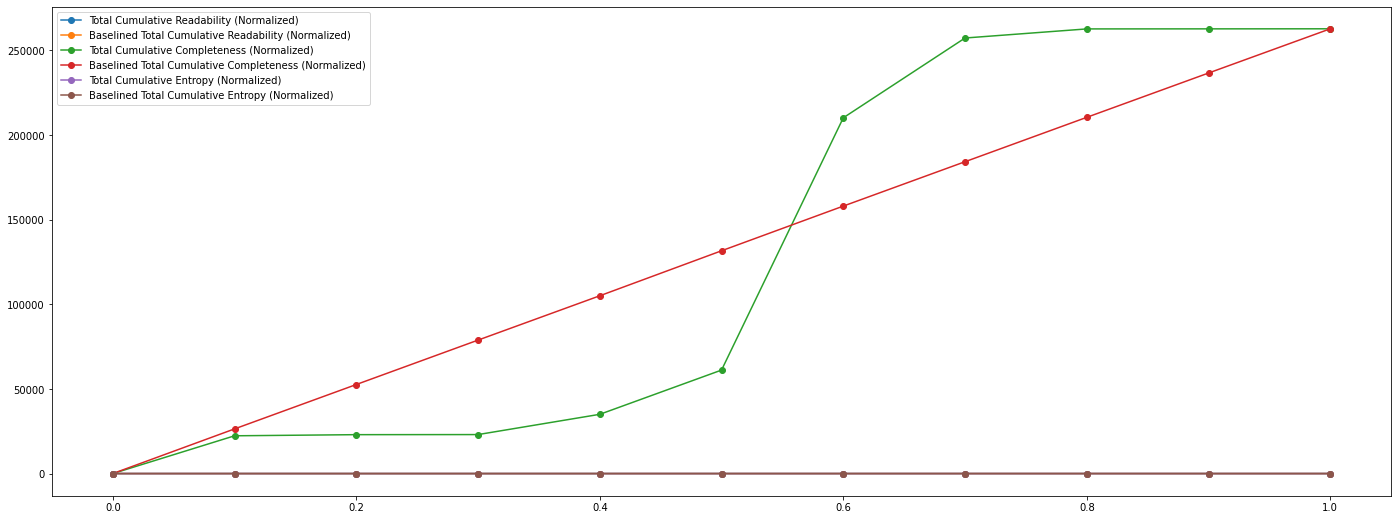

In [70]:
plt.figure(figsize=(24, 9))
plt.plot(x, cum_readability_norm, '-o', label="Total Cumulative Readability (Normalized)")
plt.plot(x, cum_baseline_readability_norm, '-o', label="Baselined Total Cumulative Readability (Normalized)")
plt.plot(x, cum_completeness_norm, '-o', label="Total Cumulative Completeness (Normalized)")
plt.plot(x, cum_baseline_completeness_norm, '-o', label="Baselined Total Cumulative Completeness (Normalized)")
#plt.plot(x, cum_yield_norm, '-o', label="Total Cumulative yield (Normalized)")
#plt.plot(x, cum_baseline_yield_norm, '-o', label="Baselined Total Cumulative yield (Normalized)")
plt.plot(x, cum_entropy_norm, '-o', label="Total Cumulative Entropy (Normalized)")
plt.plot(x, cum_baseline_entropy_norm, '-o', label="Baselined Total Cumulative Entropy (Normalized)")

plt.legend()
plt.show()